In [48]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# evaluate bagging ensemble for regression
# ------------------------------------------------------------------------------
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression





# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [49]:
# Data Loading


#training data
data_train = pd.read_excel("housing.xlsx", sheet_name='Hoja1')
data_train.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2310.0,0,0.538,65750,65.2,40900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7070.0,0,0.469,64210,78.9,49671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7070.0,0,0.469,71850,61.1,49671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2180.0,0,0.458,69980,45.8,60622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2180.0,0,0.458,71470,54.2,60622,3,222.0,18.7,396.90,5.33,36.2


In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    int64  
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    int64  
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [51]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        data_train.drop(columns = "MEDV"),
                                        data_train['MEDV'],
                                        random_state = 123
                                    )


In [52]:
#we will evaluate the model using repeated k-fold cross-validation, with three repeats and 10 folds. 
# We will report the mean absolute error (MAE) of the model across all repeats and folds. 
#The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. 
#This means that larger negative MAE are better and a perfect model has a MAE of 0.


# define the model
model = BaggingRegressor()  # If no argument by default 10 predictors/trees
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))




MAE: -2.405 (0.480)


In [53]:
n_scores

array([-3.02421053, -2.06131579, -3.07421053, -1.94684211, -2.57184211,
       -2.90947368, -1.84026316, -3.43894737, -1.79526316, -1.98540541,
       -2.38289474, -2.31947368, -2.01710526, -2.57421053, -2.16815789,
       -2.69315789, -1.66342105, -3.36052632, -2.93      , -1.82594595,
       -2.25078947, -2.44631579, -2.79263158, -2.40684211, -1.92921053,
       -2.83763158, -2.69026316, -2.27157895, -2.16473684, -1.77513514])

In [54]:
# fit the model on the whole dataset
model.fit(X_train, y_train)
# make a single prediction

yhat = model.predict(X_train)
print('Prediction: %d' % yhat[0])

Prediction: 21


In [55]:
from sklearn import metrics

# bagging ensemble for making predictions for regression

# Model training error
#-------------------------------------------------------------------------------
prediction_train = model.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),4))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train

R2 Value in training: 0.9756
Accuracy in training 95.22


In [56]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = model.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

Accuracy in test 88.3


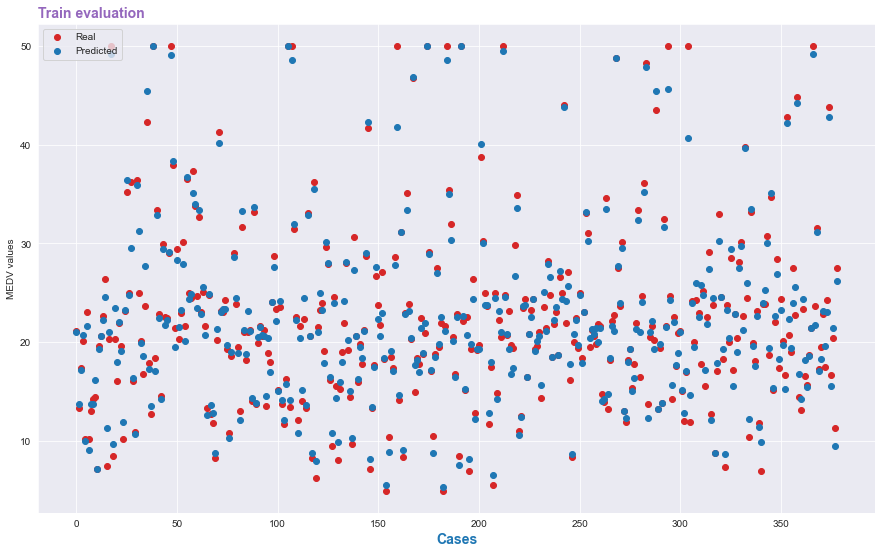

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_train)))

ax.scatter(x_axis, y_train, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Train evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

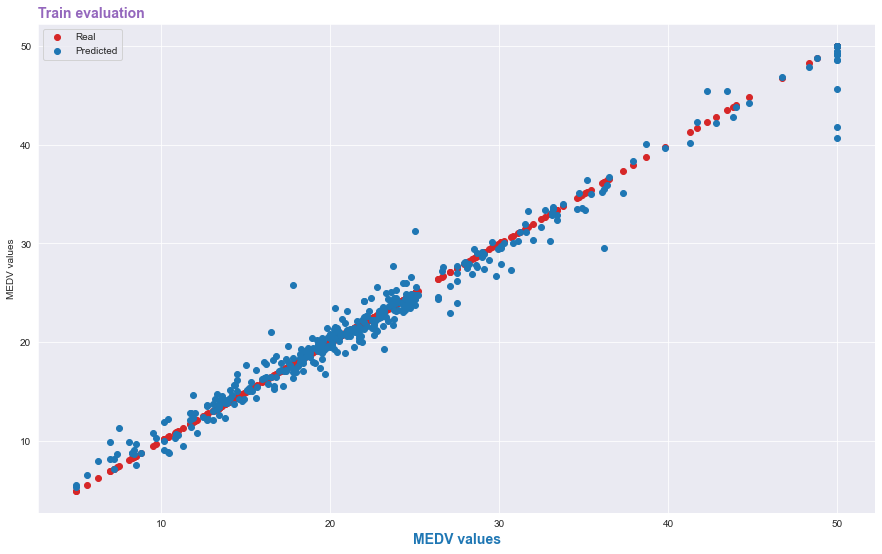

In [58]:
import matplotlib.pyplot as plt  # TRAINING

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_train, y_train, color = 'tab:red', label='Real')
ax.scatter(y_train, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("MEDV values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Train evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

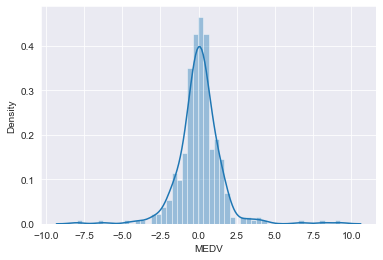

In [59]:
# Error in training
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(y_train-prediction_train)

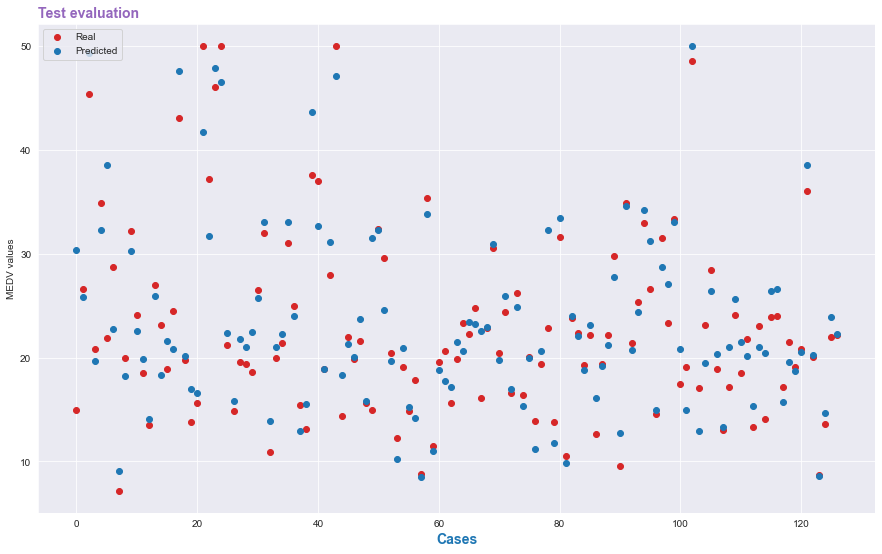

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_test)))

ax.scatter(x_axis, y_test, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

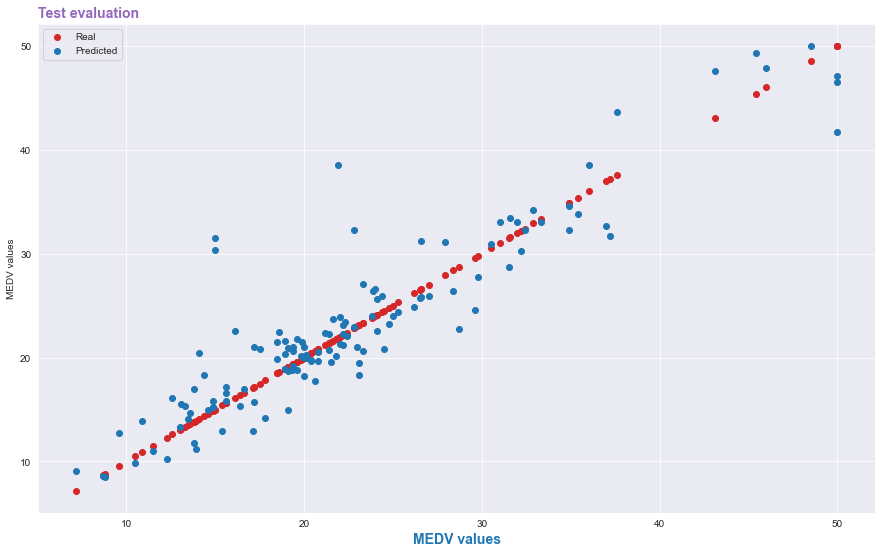

In [61]:
#######  TEST

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("MEDV values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

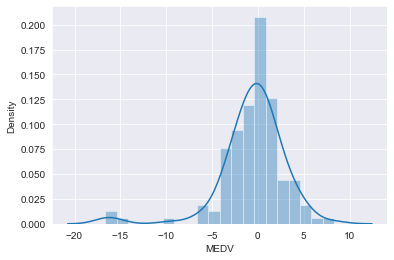

In [62]:
# Error in test

sns.set_style('darkgrid')
sns.distplot(y_test-prediction_test)

In [63]:
# explore bagging ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
from sklearn.model_selection import KFold
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 500, 1000, 2000]
    #n_trees = [10]
    for n in n_trees:
        models[str(n)] = BaggingRegressor(n_estimators=n)
    return models
 

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv = KFold(n_splits=5,  shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, pd.DataFrame(X), pd.DataFrame(y), scoring='r2', cv=cv)
    return scores
 
# get the models to evaluate
#models = get_models()
# evaluate the models and store results
#results, names = list(), list()


>10 0.831 (0.025)
>50 0.849 (0.007)
>100 0.844 (0.012)
>500 0.854 (0.013)
>1000 0.849 (0.017)
>2000 0.850 (0.015)


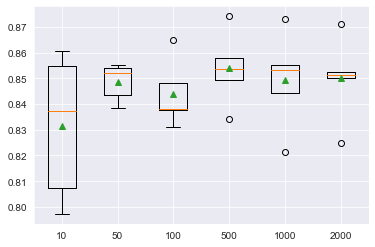

In [65]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [66]:
# explore bagging ensemble number of samples effect on performance
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = BaggingRegressor(max_samples=i) # The number of samples to draw from X to train each base estimator (with replacement by default)
    return models


# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, pd.DataFrame(X), pd.DataFrame(y), scoring='r2', cv=cv, n_jobs=-1)
    return scores

>0.1 0.732 (0.037)
>0.2 0.794 (0.024)
>0.3 0.818 (0.019)
>0.4 0.832 (0.023)
>0.5 0.818 (0.020)
>0.6 0.828 (0.022)
>0.7 0.829 (0.016)
>0.8 0.849 (0.026)
>0.9 0.822 (0.020)
>1.0 0.840 (0.026)


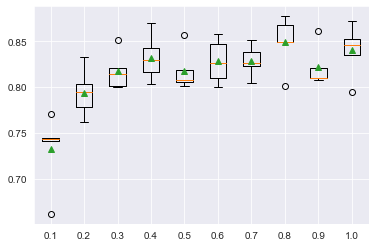

In [67]:
# explore bagging ensemble number of samples effect on performance


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [68]:

# define the brest model
model_best = BaggingRegressor(n_estimators=1000, max_samples=0.8 )  
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_best, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -2.296 (0.404)


In [69]:
# fit the model on the whole dataset
model_best.fit(X_train, y_train)

BaggingRegressor(max_samples=0.8, n_estimators=1000)

In [70]:
from sklearn import metrics

# bagging ensemble for making predictions for regression

# Model training error
#-------------------------------------------------------------------------------
prediction_train = model_best.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training best:', round(metrics.r2_score(y_train, prediction_train),4))

#Measuring accuracy on Testing Data
print('Accuracy in training best',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train

R2 Value in training best: 0.9731
Accuracy in training best 94.72


In [71]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = model_best.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test best',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

Accuracy in test best 88.76


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

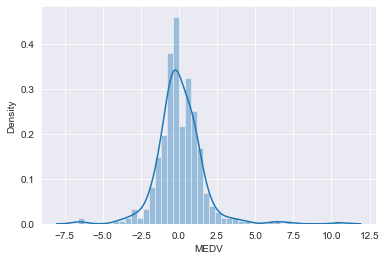

In [72]:
# Error in training
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(y_train-prediction_train)

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

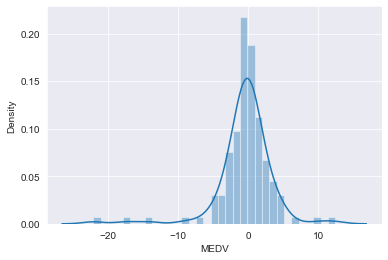

In [73]:
# Error in test

sns.set_style('darkgrid')
sns.distplot(y_test-prediction_test)

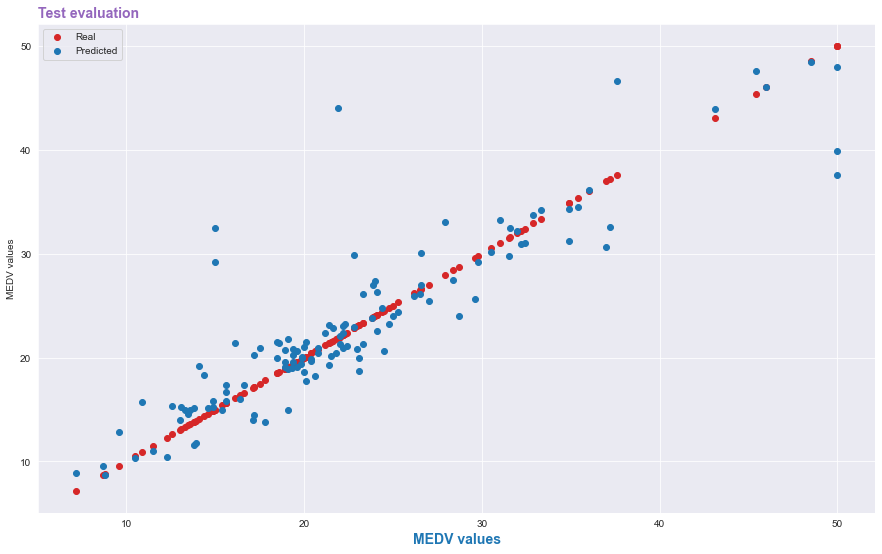

In [74]:
#######  TEST

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("MEDV values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()